# RRT with Kristian Gulaker and Bendik Løvlie

In [14]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import norm
import matplotlib.pyplot as plt
import time
import collision

from anytree import Node, RenderTree, AsciiStyle, PreOrderIter
import anytree

hit_goal = False
step_size = 50
limitX = 1000
limitY = 1000


In [15]:
#Create collision objects

circle1_pos = collision.Vector(250,250)
circle1 = collision.Circle(circle1_pos,100)
#plt.plot(circle1.pos.x, circle1.pos.x,marker="o", markersize=circle1.radius,markeredgecolor="green",markerfacecolor="green",label="Goal")

circle2_pos = collision.Vector(750,500)
circle2 = collision.Circle(circle2_pos,200)
#plt.plot(circle2.pos.x, circle2.pos.y,marker="o", markersize=circle2.radius, markeredgecolor="green",markerfacecolor="green",label="Goal")

circle3_pos = collision.Vector(350,700)
circle3 = collision.Circle(circle3_pos,100)

collisionobjects = [circle1, circle2, circle3]

In [16]:
def find_leaf_nodes(root):
    leaf_nodes = np.array([])
    for node in PreOrderIter(root):
        if node.children == ():
            leaf_nodes = np.append(leaf_nodes, node)
    return leaf_nodes

In [17]:
def print_tree(root, goal):
    leaf_nodes = find_leaf_nodes(root)
    #print(leaf_nodes)
    w = anytree.walker.Walker()
    
    for leaf in leaf_nodes:
        nodes = w.walk(leaf,root)[0]
        #print(nodes)
        coords_to_plot = np.empty((2,0),int)
        for node in nodes:
            coords_to_plot = np.append(coords_to_plot, np.array([node.coord]).T, axis = 1)
        #print(coords_to_plot)
        plt.plot(coords_to_plot[0,:], coords_to_plot[1,:], "-o")
        
    plt.plot(goal[0], goal[1],marker="o", markersize=20,markeredgecolor="green",markerfacecolor="green",label="Goal")
    plt.legend()
    plt.show()

In [18]:
def get_random_node_coords(limitX, limitY):
    random_node_coords = np.around([limitX, limitY] * np.random.rand(1,2)[0],0).astype(int)
    return random_node_coords

In [19]:
def nearest_neighbor(TreeRoot, x_rand):
    
    dist_to_nearest = 1000000
    x_nearest = []
    for node in PreOrderIter(root):
        x = x_rand[0]-node.coord[0]
        y = x_rand[1]-node.coord[1]
        temp_dist = norm([x,y])    
        
        if temp_dist < dist_to_nearest:                               
            x_nearest = node
            dist_to_nearest = temp_dist
    
    return x_nearest

In [20]:
def steer(x_nearest, x_rand, step):
    x_new = [0,0]
    x = x_rand[0] - x_nearest.coord[0]
    y = x_rand[1] - x_nearest.coord[1]
    dist = norm([x,y])
    if dist == 0:
        return [x_rand[0], x_rand[1]]
    factor = step/dist
    shortened_vec = np.around([x*factor, y*factor],0).astype(int)
    
    if dist <= step:
        x_new = [x_rand[0], x_rand[1]]
    else:
        x_new = [x_nearest.coord[0] + shortened_vec[0],x_nearest.coord[1] + shortened_vec[1]]
    return x_new

In [21]:
def get_distance(coord, node):
    x = coord[0] - node.coord[0]
    y = coord[1] - node.coord[1]
    return norm([x,y])

HIT GOAAAAL


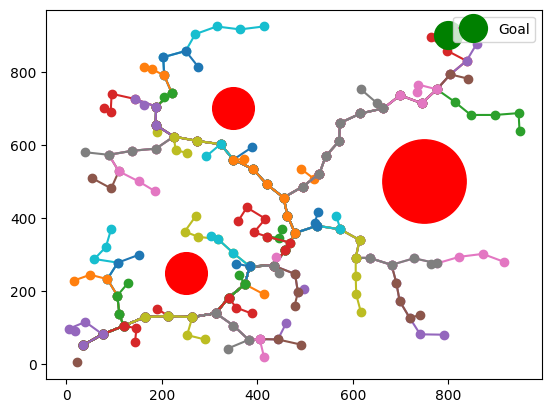

In [22]:
##Main loop
nodeindex = 1
start_coord = np.array([10,10])
#goal_coord = np.around([limitX, limitY] * np.random.rand(1,2)[0],0).astype(int)
goal_coord = np.array([800,900])
approved_dist_from_goal = 50

root = Node(nodeindex, coord = start_coord)
nodeindex = nodeindex + 1

hit_goal = False
while not hit_goal:
#for i in range(0,500):
    #print(i)
    x_rand = get_random_node_coords(limitX, limitY)
    x_nearest = nearest_neighbor(root, x_rand)
    x_new_coord = steer(x_nearest, x_rand, step_size)
    
    
    ### COLLISION HANDLING ########
    middle_point_np = np.around([x_nearest.coord[0]+(x_new_coord[0]-x_nearest.coord[0])/2, x_nearest.coord[1]+(x_new_coord[1]-x_nearest.coord[1])/2],0).astype(int)
    middle_point = collision.Vector(middle_point_np[0],middle_point_np[1])
    
    collider_poly_points = [collision.Vector(x_new_coord[0]-middle_point.x,x_new_coord[1]-middle_point.y),\
                            collision.Vector(x_new_coord[0]-1-middle_point.x,x_new_coord[1]-1-middle_point.y),\
                            collision.Vector(x_nearest.coord[0]-middle_point.x,x_nearest.coord[1]-middle_point.y),\
                            collision.Vector(x_nearest.coord[0]+1-middle_point.x,x_nearest.coord[1]-1-middle_point.y)]
    
    collider_poly = collision.Poly(middle_point, collider_poly_points)
   
    has_collided = False
    for elem in collisionobjects:
        if collision.collide(collider_poly, elem):
            #print("HAS COLLIDED")
            has_collided = True
            
    #################################
        
    if not has_collided:
        x_new = Node(nodeindex, parent = x_nearest, coord = x_new_coord)
        nodeindex = nodeindex + 1
        distance_from_goal = get_distance(goal_coord, x_nearest)
        if distance_from_goal < approved_dist_from_goal:
            print("HIT GOAAAAL")
            hit_goal = True
    

for elem in collisionobjects:
    plt.plot(elem.pos.x, elem.pos.y,marker="o", markersize=0.3*elem.radius,markeredgecolor="red",markerfacecolor="red")


    
print_tree(root, goal_coord)
    

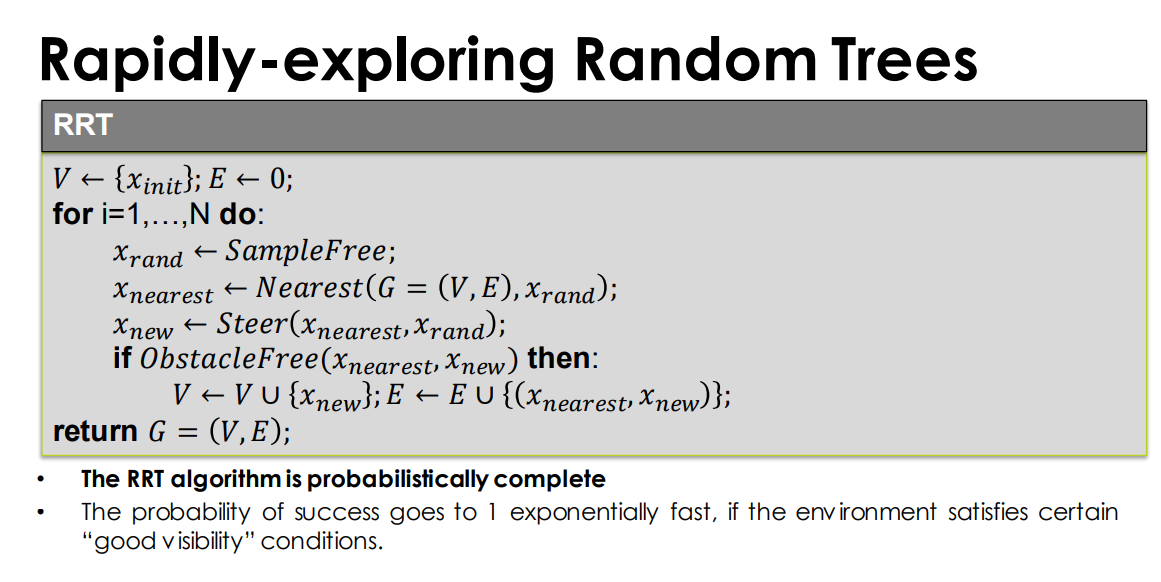